# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Importing the dataset

In [2]:
train = pd.read_csv("train.csv")
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [3]:
test = pd.read_csv("test.csv")
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


# Data Visualization

In [4]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
train.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [7]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

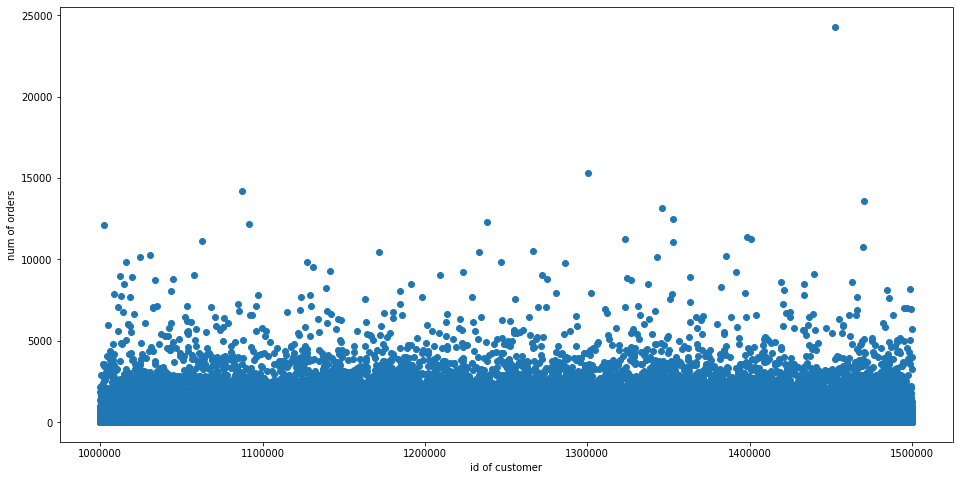

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['id'], train['num_orders'])
ax.set_xlabel('id of customer')
ax.set_ylabel('num of orders')
plt.show()

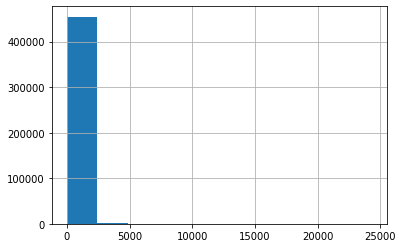

In [9]:
train['num_orders'].hist(bins=10)

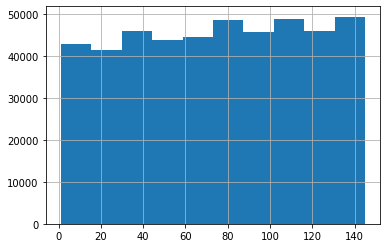

In [10]:
train['week'].hist(bins=10)

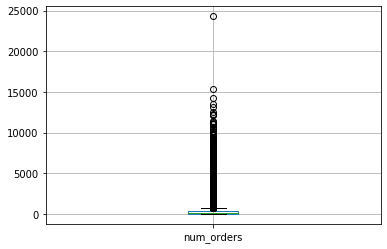

In [11]:
train.boxplot(column="num_orders")

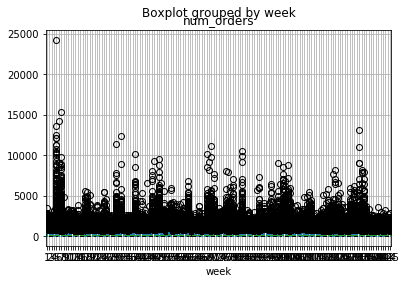

In [12]:
train.boxplot(column="num_orders",by="week")

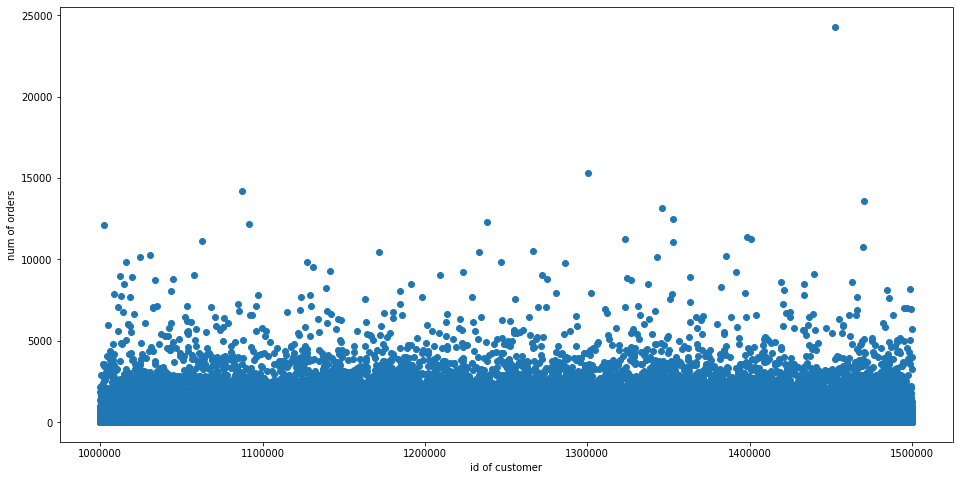

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['id'], train['num_orders'])
ax.set_xlabel('id of customer')
ax.set_ylabel('num of orders')
plt.show()

In [14]:
'''import seaborn as sns
sns.pairplot(dataset_final)'''

'import seaborn as sns\nsns.pairplot(dataset_final)'

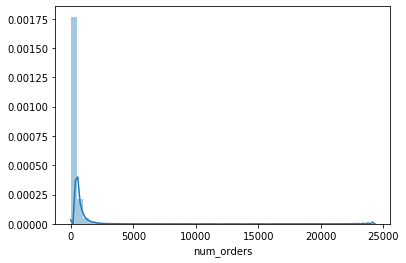

In [15]:
sns.distplot(train['num_orders'])

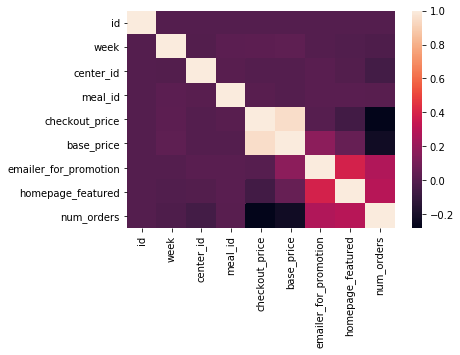

In [16]:
# Plot the correlation usinf heatmap
corr = train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

# Taking care of Missing data

Finding the missing data

In [17]:
#Get a count of missing values in the dataset
train.apply(lambda x: sum(x.isnull()),axis=0)

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


# Label Encoding

There are no categorical variables so no need of using label encoding

# One Hot Encoding

# Feature Scaling

In [19]:
trainfinal = train.drop(['center_id', 'meal_id'], axis=1)

In [20]:
trainfinal

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,136.83,152.29,0,0,177
1,1466964,1,136.83,135.83,0,0,270
2,1346989,1,134.86,135.86,0,0,189
3,1338232,1,339.50,437.53,0,0,54
4,1448490,1,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...
456543,1271326,145,484.09,484.09,0,0,68
456544,1062036,145,482.09,482.09,0,0,42
456545,1110849,145,237.68,321.07,0,0,501
456546,1147725,145,243.50,313.34,0,0,729


In [21]:
x=trainfinal.iloc[:,0:6]
x

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1379560,1,136.83,152.29,0,0
1,1466964,1,136.83,135.83,0,0
2,1346989,1,134.86,135.86,0,0
3,1338232,1,339.50,437.53,0,0
4,1448490,1,243.50,242.50,0,0
...,...,...,...,...,...,...
456543,1271326,145,484.09,484.09,0,0
456544,1062036,145,482.09,482.09,0,0
456545,1110849,145,237.68,321.07,0,0
456546,1147725,145,243.50,313.34,0,0


In [22]:
y=trainfinal.iloc[:,6]
y

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [23]:
#Apply normalization to rescale the features to a standard range of values.
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.75912152, 0.        , 0.15505618, 0.11954323, 0.        ,
        0.        ],
       [0.93392987, 0.        , 0.15505618, 0.0992453 , 0.        ,
        0.        ],
       [0.69397939, 0.        , 0.15277424, 0.0992823 , 0.        ,
        0.        ],
       ...,
       [0.22169844, 1.        , 0.27187536, 0.32767721, 0.        ,
        0.        ],
       [0.29545059, 1.        , 0.27861694, 0.31814482, 0.        ,
        0.        ],
       [0.72396945, 1.        , 0.33483146, 0.28939969, 0.        ,
        0.        ]])

# Splitting the data into train and test sets

In [24]:
trainfinal2 = trainfinal.drop(['num_orders'], axis=1)

In [25]:
features = trainfinal2.columns.tolist()
features

['id',
 'week',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured']

In [26]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=0)

# Training and testing the model

In [27]:
model1 = sm.OLS(y,x).fit()
predictions = model1.predict(x)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             num_orders   R-squared (uncentered):                   0.428
Model:                            OLS   Adj. R-squared (uncentered):              0.428
Method:                 Least Squares   F-statistic:                          5.682e+04
Date:                Sun, 17 May 2020   Prob (F-statistic):                        0.00
Time:                        18:34:03   Log-Likelihood:                     -3.3340e+06
No. Observations:              456548   AIC:                                  6.668e+06
Df Residuals:                  456542   BIC:                                  6.668e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
id                        0.0003   1.21e-06    267.530      0.000       0.000       0.000
week                      0.1514      0.013     12.035      0.000       0.127       0.176
checkout_price           -0.2874      0.014    -20.655      0.000      -0.315      -0.260
base_price               -0.3385      0.013    -25.223      0.000      -0.365      -0.312
emailer_for_promotion   321.0495      2.406    133.453      0.000     316.334     325.765
homepage_featured       271.7202      1.893    143.551      0.000     268.010     275.430
==============================================================================
Omnibus:                   591775.926   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        382992979.971
Skew:                           6.793   Prob(JB):                         0.00
Kurtosis:                     144.240   Cond. No.                     5.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X_train

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured
141016,1473139,48,277.45,277.45,0,0
406574,1220479,130,414.25,413.25,0,0
189872,1186734,64,457.90,639.23,1,0
323934,1209372,105,411.28,486.03,0,0
142275,1467845,48,620.86,620.86,0,0
...,...,...,...,...,...,...
152315,1290260,52,276.45,310.43,0,0
439107,1305422,140,243.53,243.53,0,0
117952,1281568,41,164.93,163.93,0,0
435829,1035207,139,206.61,208.61,0,0


In [29]:
y_train

141016      26
406574      81
189872     391
323934      15
142275      69
          ... 
152315     108
439107     190
117952     445
435829     242
305711    1256
Name: num_orders, Length: 365238, dtype: int64

In [30]:
features1 = X_train.iloc[:,:].values

In [31]:
features1

array([[1.473139e+06, 4.800000e+01, 2.774500e+02, 2.774500e+02,
        0.000000e+00, 0.000000e+00],
       [1.220479e+06, 1.300000e+02, 4.142500e+02, 4.132500e+02,
        0.000000e+00, 0.000000e+00],
       [1.186734e+06, 6.400000e+01, 4.579000e+02, 6.392300e+02,
        1.000000e+00, 0.000000e+00],
       ...,
       [1.281568e+06, 4.100000e+01, 1.649300e+02, 1.639300e+02,
        0.000000e+00, 0.000000e+00],
       [1.035207e+06, 1.390000e+02, 2.066100e+02, 2.086100e+02,
        0.000000e+00, 0.000000e+00],
       [1.254255e+06, 9.900000e+01, 1.503800e+02, 1.513800e+02,
        0.000000e+00, 0.000000e+00]])

In [32]:
labels1 = y_train.iloc[:].values
labels1

array([  26,   81,  391, ...,  445,  242, 1256], dtype=int64)

In [33]:
X=features1
y=labels1

In [34]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y)

In [35]:
predictions = model.predict(X)

In [36]:
#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.19180125754407784


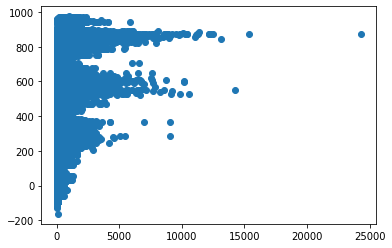

In [37]:
#Visualize the predictions
plt.scatter(y_train, predictions)

In [38]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")


import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [ 1.96134486e-06 -7.30644790e-02 -3.29160790e-01 -3.70314086e-01
  3.23167667e+02  2.64747906e+02]
Intercept: 450.1895936191081


The model performance
--------------------------------------
RMSE is 357.2025639314184
R2 score is 0.19180125754407784




# Decision Tree Regressor

In [39]:
trainfinal

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,136.83,152.29,0,0,177
1,1466964,1,136.83,135.83,0,0,270
2,1346989,1,134.86,135.86,0,0,189
3,1338232,1,339.50,437.53,0,0,54
4,1448490,1,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...
456543,1271326,145,484.09,484.09,0,0,68
456544,1062036,145,482.09,482.09,0,0,42
456545,1110849,145,237.68,321.07,0,0,501
456546,1147725,145,243.50,313.34,0,0,729


In [40]:
X_train

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured
141016,1473139,48,277.45,277.45,0,0
406574,1220479,130,414.25,413.25,0,0
189872,1186734,64,457.90,639.23,1,0
323934,1209372,105,411.28,486.03,0,0
142275,1467845,48,620.86,620.86,0,0
...,...,...,...,...,...,...
152315,1290260,52,276.45,310.43,0,0
439107,1305422,140,243.53,243.53,0,0
117952,1281568,41,164.93,163.93,0,0
435829,1035207,139,206.61,208.61,0,0


In [41]:
y_train

141016      26
406574      81
189872     391
323934      15
142275      69
          ... 
152315     108
439107     190
117952     445
435829     242
305711    1256
Name: num_orders, Length: 365238, dtype: int64

In [42]:
X_test

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured
242838,1252583,80,292.03,291.03,0,1
314826,1172542,102,121.31,119.31,0,0
57041,1424353,20,282.33,282.33,0,0
87123,1271875,30,197.94,197.94,0,0
154611,1043110,52,303.64,302.64,0,0
...,...,...,...,...,...,...
231834,1469878,77,195.00,243.53,0,0
161380,1481259,55,484.03,679.03,1,1
173848,1328111,59,226.01,226.01,0,0
243709,1212260,80,195.03,290.03,0,0


In [43]:
y_test

242838    122
314826    216
57041      95
87123     177
154611     80
         ... 
231834     81
161380    852
173848    161
243709    796
82834     189
Name: num_orders, Length: 91310, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 344.9946542101456


In [45]:
features

['id',
 'week',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured']

In [46]:
X_test = test[features].values

In [47]:
pred = DT.predict(X_test)
pred[pred<0] = 0
decisiontree_pred = pd.DataFrame({
    'id' : test['id'],
    'num_orders' : pred,
    'meal_id' : test['meal_id'],
    'center_id' : test['center_id']
    
})

In [48]:
decisiontree_pred

,id,num_orders,meal_id,center_id
0,1028232,161.0,1885,55
1,1127204,109.0,1993,55
2,1212707,1066.0,2539,55
3,1082698,13.0,2631,55
4,1400926,40.0,1248,55
...,...,...,...,...
32568,1250239,15.0,1543,61
32569,1039516,55.0,2304,61
32570,1158107,189.0,2664,61
32571,1444235,540.0,2569,61


In [49]:
decisiontree_pred.describe()

,id,num_orders,meal_id,center_id
count,3.257300e+04,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,266.777761,2032.067909,81.901728
std,1.441580e+05,414.031494,547.199004,45.950455
min,1.000085e+06,13.000000,1062.000000,10.000000
25%,1.123969e+06,55.000000,1558.000000,43.000000
50%,1.247296e+06,136.000000,1993.000000,76.000000
75%,1.372971e+06,312.000000,2569.000000,110.000000
max,1.499996e+06,13150.000000,2956.000000,186.000000


In [50]:
'''submit.to_csv("submitted.csv", index=False)'''

'submit.to_csv("submitted.csv", index=False)'

# Random Forest Regressor

In [51]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [52]:
X = train.iloc[:, 0:4].values
y = train.iloc[:, 8].values

In [53]:
X

array([[1379560,       1,      55,    1885],
       [1466964,       1,      55,    1993],
       [1346989,       1,      55,    2539],
       ...,
       [1110849,     145,      61,    2664],
       [1147725,     145,      61,    2569],
       [1361984,     145,      61,    2490]], dtype=int64)

In [54]:
y

array([177, 270, 189, ..., 501, 729, 162], dtype=int64)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [58]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 196.73855006746143


In [59]:
y=train['num_orders']
X=train.drop(['num_orders'],axis=1)
X_test=test
display(X.head())
X_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1379560,1,55,1885,136.83,152.29,0,0
1,1466964,1,55,1993,136.83,135.83,0,0
2,1346989,1,55,2539,134.86,135.86,0,0
3,1338232,1,55,2139,339.50,437.53,0,0
4,1448490,1,55,2631,243.50,242.50,0,0


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

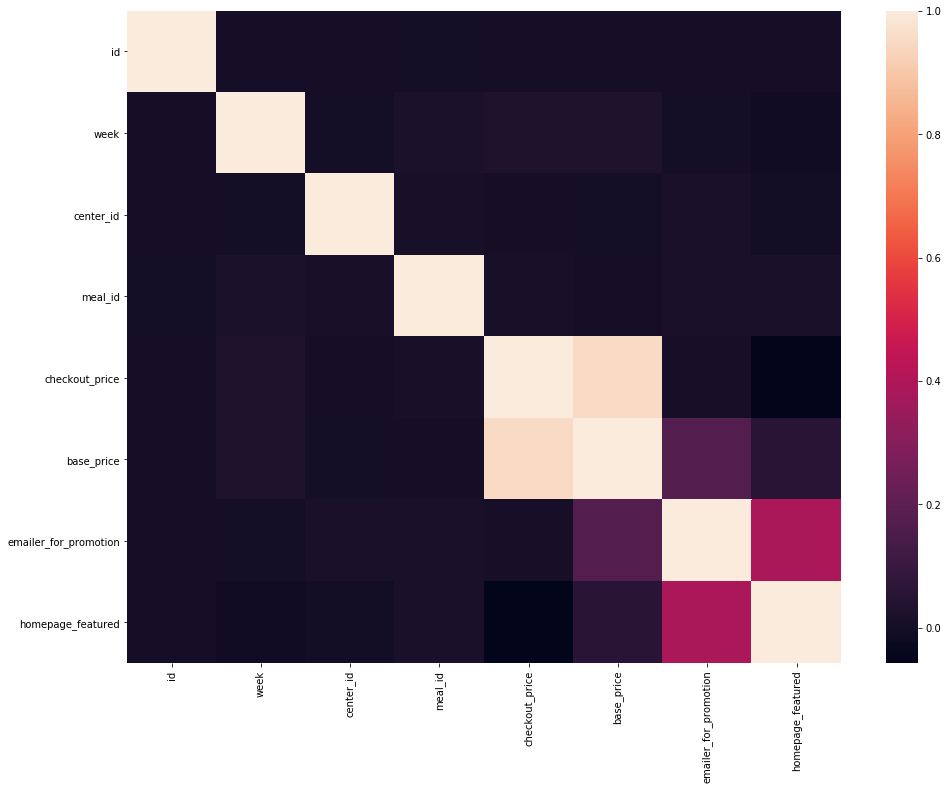

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 12))

sns.heatmap(X.corr())

In [62]:
regressor.fit(X.values,np.array(y))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [63]:
pred = regressor.predict(X_test)
pred[pred<0] = 0
Randomforest_pred = pd.DataFrame({
    'id' : test['id'],
    'num_orders' : pred,
    'meal_id' : test['meal_id'],
    'center_id' : test['center_id']
    
})

In [64]:
pred

array([663.08, 245.04, 191.97, ..., 336.25, 339.54, 263.87])

In [65]:
Randomforest_pred

,id,num_orders,meal_id,center_id
0,1028232,663.08,1885,55
1,1127204,245.04,1993,55
2,1212707,191.97,2539,55
3,1082698,69.02,2631,55
4,1400926,54.74,1248,55
...,...,...,...,...
32568,1250239,53.37,1543,61
32569,1039516,28.35,2304,61
32570,1158107,336.25,2664,61
32571,1444235,339.54,2569,61


In [66]:
Randomforest_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32573 non-null  int64  
 1   num_orders  32573 non-null  float64
 2   meal_id     32573 non-null  int64  
 3   center_id   32573 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1018.0 KB


In [67]:
Randomforest_pred.dtypes

id              int64
num_orders    float64
meal_id         int64
center_id       int64
dtype: object